In [4]:
import os
import numpy as np
import pandas as pd
import anndata as ad
import numpy as np
import scanpy as sc
import time
import glob
import matplotlib.pyplot as plt
import scvelo as scv
from TSvelo.TSvelo_utils import project_t, get_colors_step_subs, analyze_g_subs, analyze_g

dataset_name = 'dentategyrus' 
save_folder = 'TSvelo_' + dataset_name + '/'

adata = ad.read_h5ad(save_folder +"/TSvelo.h5ad")
h5ad_file_path_all = glob.glob(os.path.join(save_folder, '*_TSvelo.h5ad'))
adata_subs = []
for li in range(len(h5ad_file_path_all)):
    adata_l = ad.read_h5ad(save_folder+'/l'+str(li)+'_TSvelo.h5ad')
    adata_subs.append(adata_l)
print(adata)

AnnData object with n_obs × n_vars = 18213 × 171
    obs: 'Age', 'CellID', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 't', 'velocity_self_transition', 'velocity_length', 'velocity_confidence_transition', 'velocity_consistency'
    var: 'Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'n_TFs', 'g_select_metric', 'non_sparse_rate', 'selected_genes'
    uns: 'ClusterName_colors', 'all_TFs', 'clusters_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_

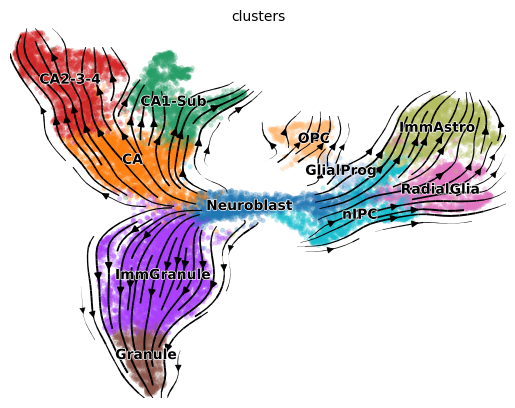

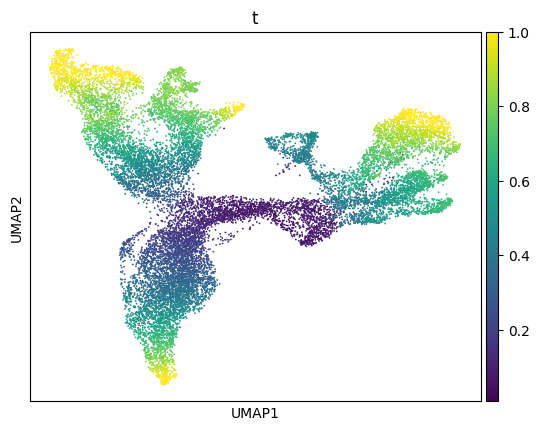

In [7]:
scv.pl.velocity_embedding_stream(adata, vkey='velocity')
sc.pl.umap(adata, color='t')

Drawing ANK3


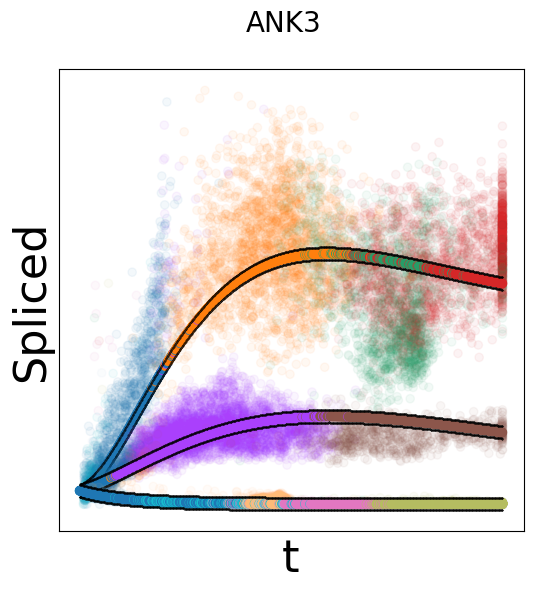

In [2]:
gene_list = ['ANK3']

adata_subs = project_t(adata, adata_subs)
colors_step_subs_0 = get_colors_step_subs(adata_subs)
max_subs_dict = {}
for g_id, g in enumerate(gene_list): 
    max_subs = analyze_g_subs(adata_subs, g, colors_step_subs_0, to_show=True, figure_folder=save_folder+'figures_g/')
    max_subs = max_subs/max_subs.max()
    max_subs_dict[g] = max_subs
    

Drawing ANK3


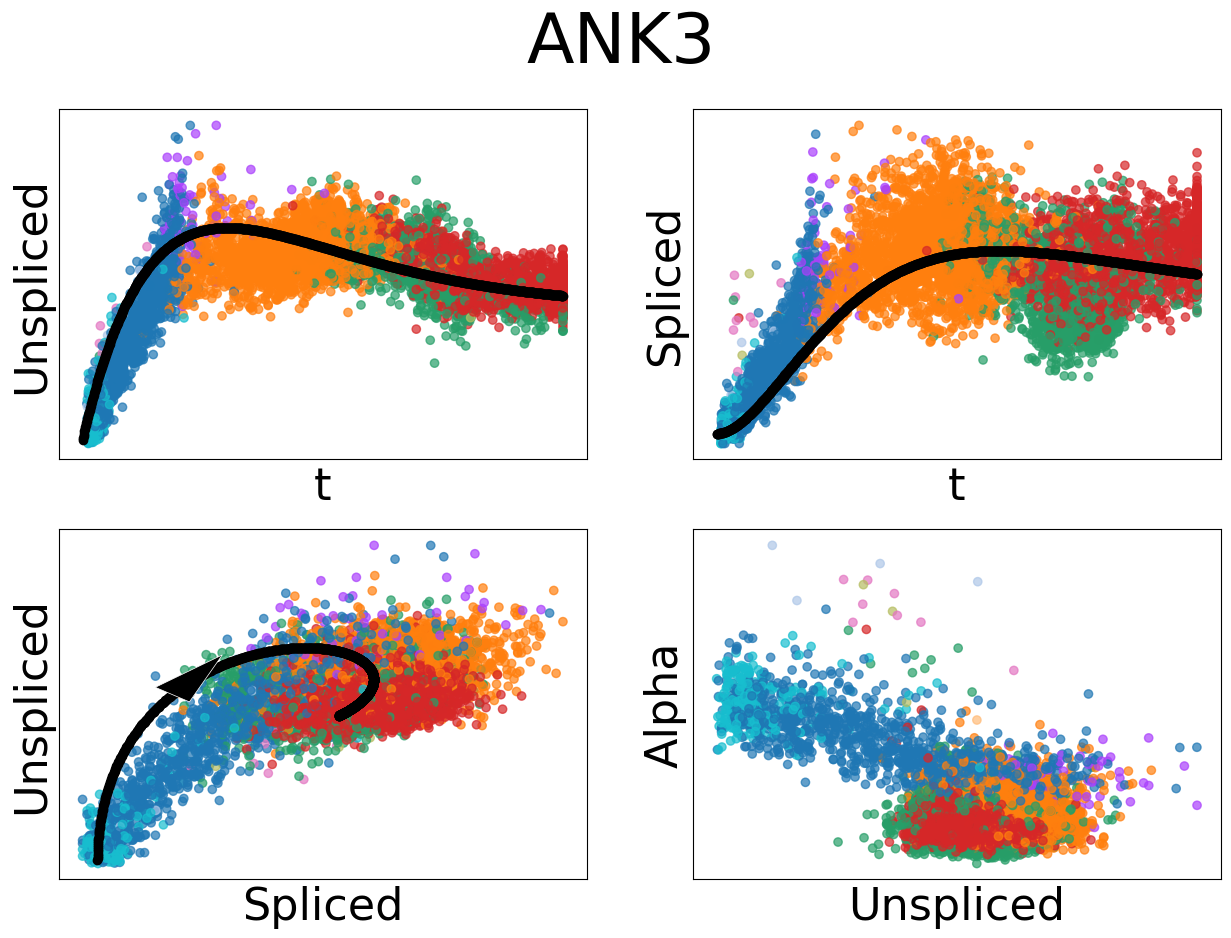

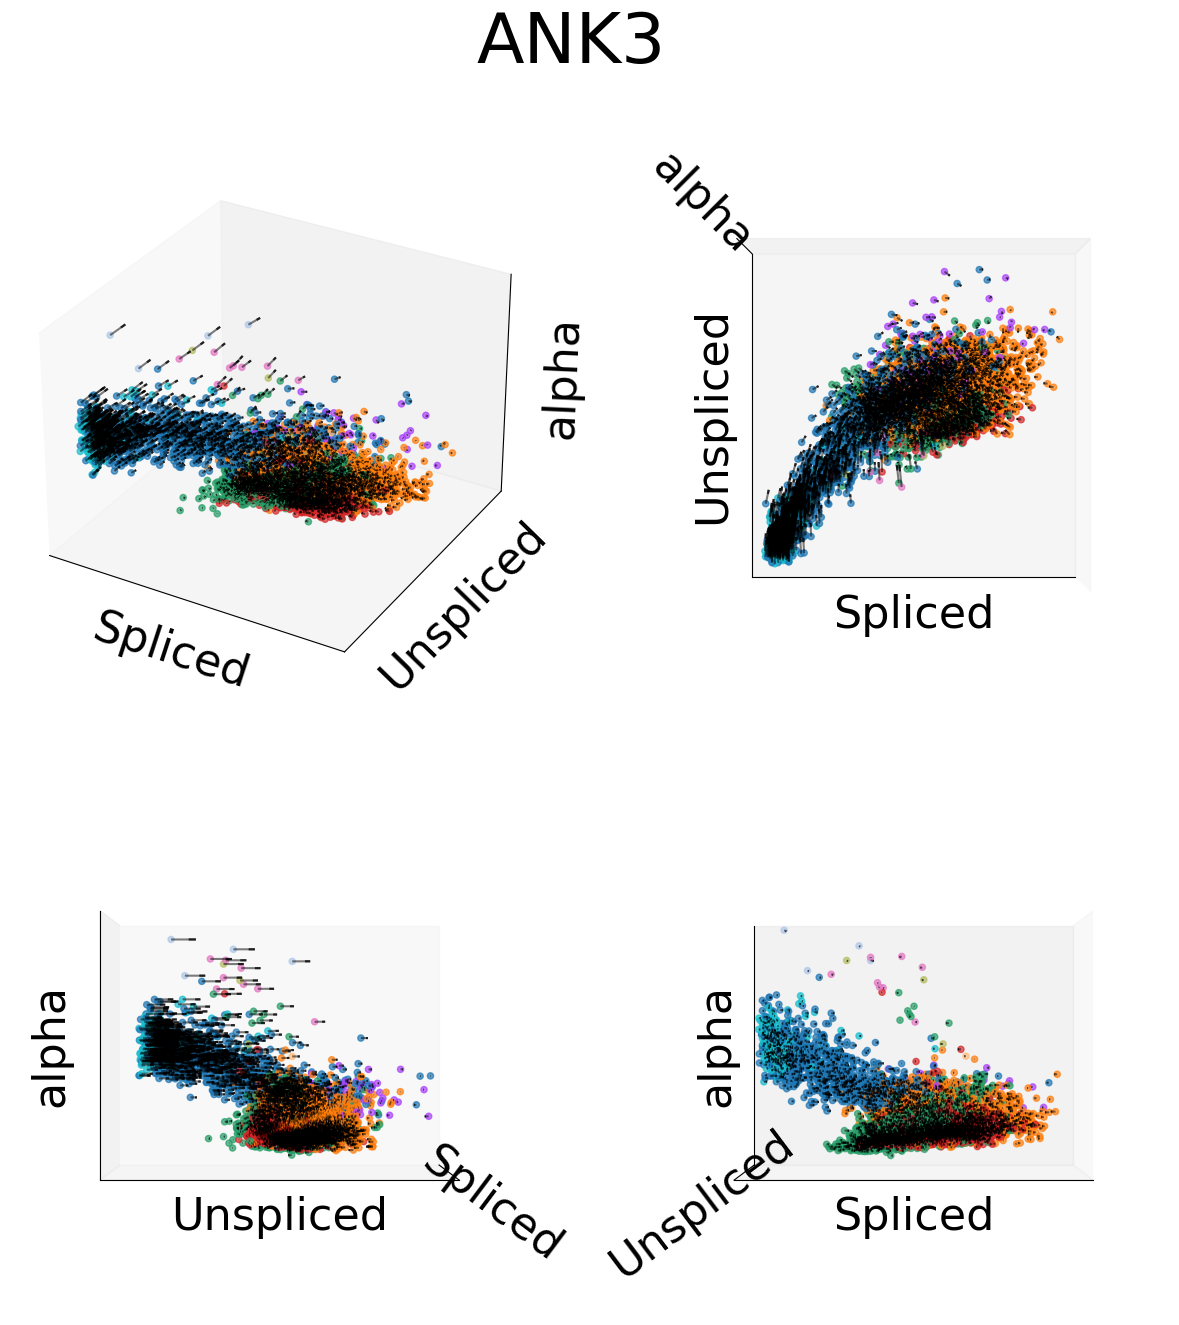

Drawing ANK3


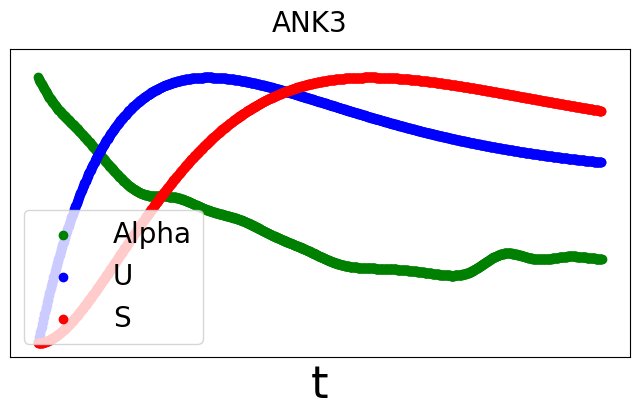

Drawing ANK3


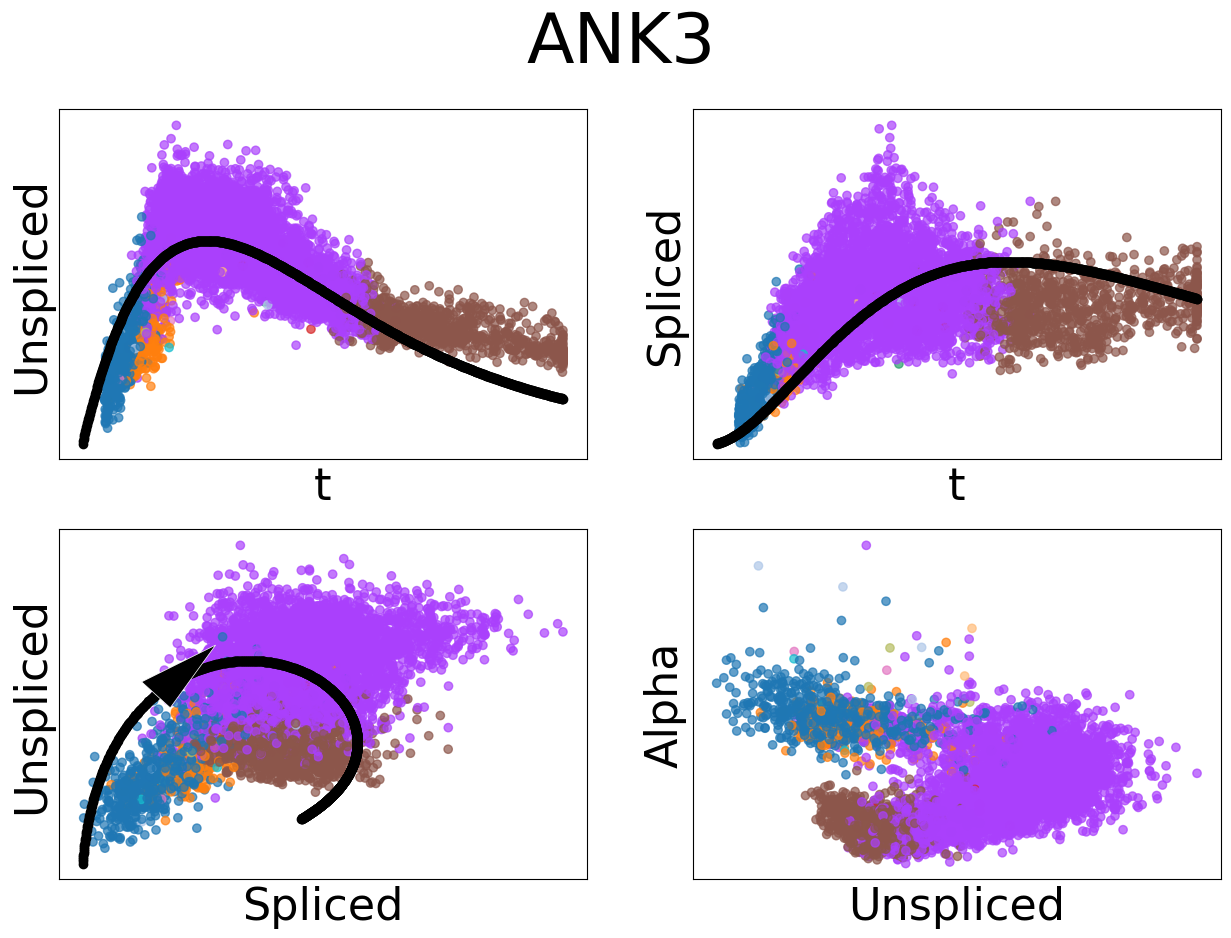

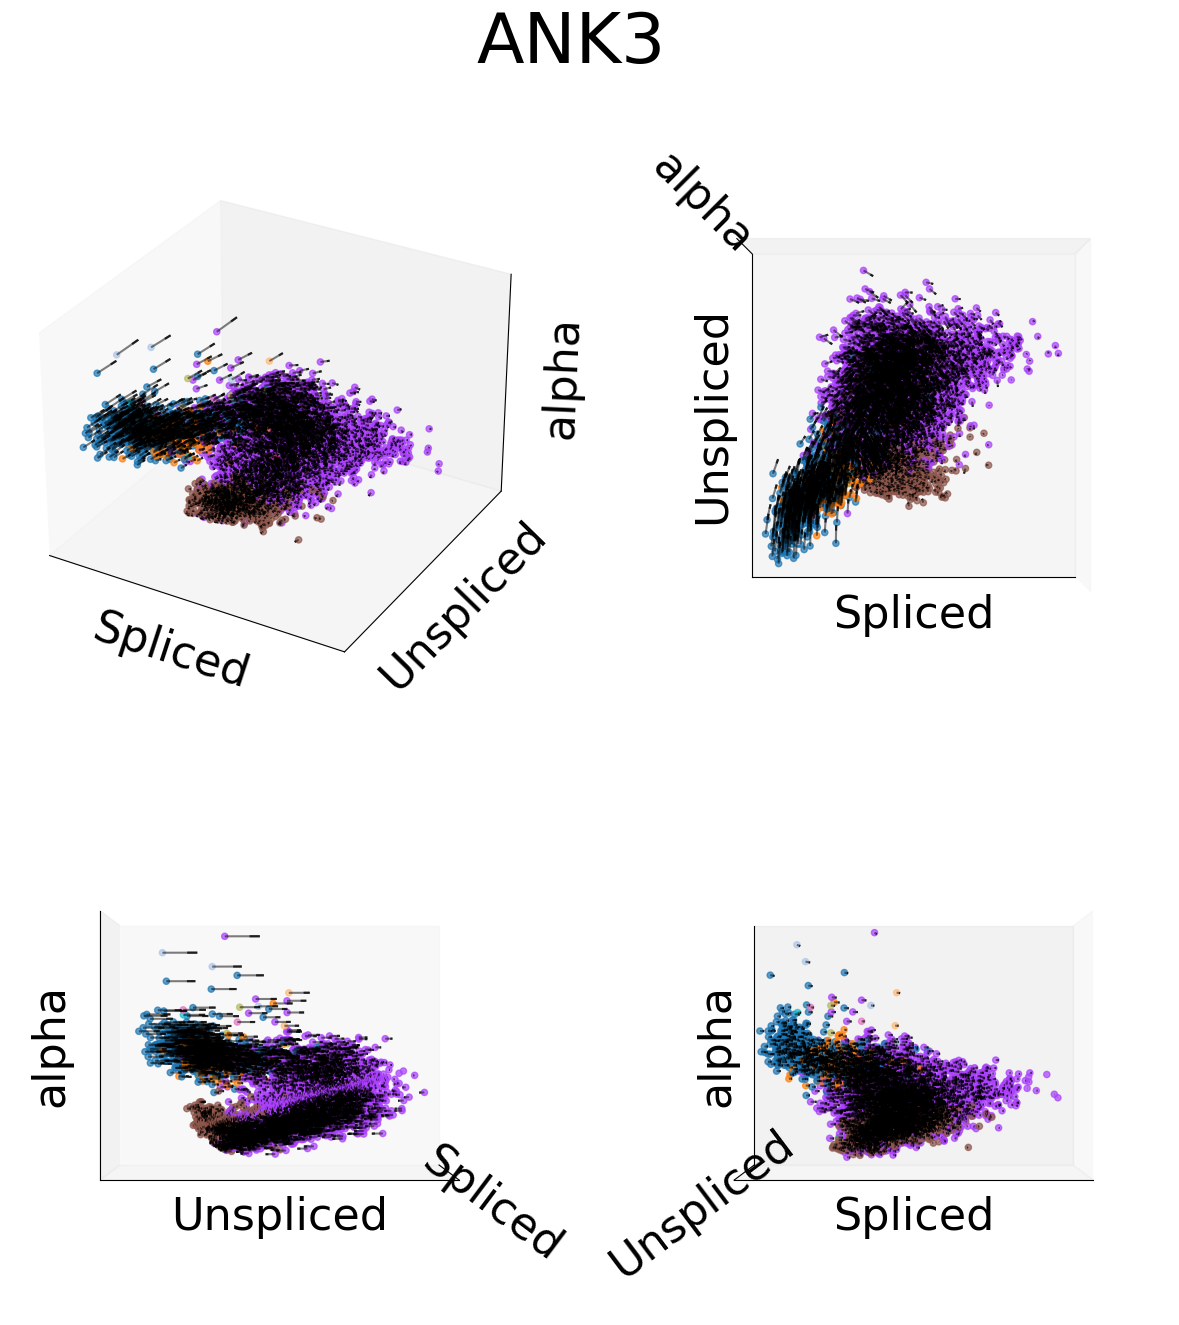

Drawing ANK3


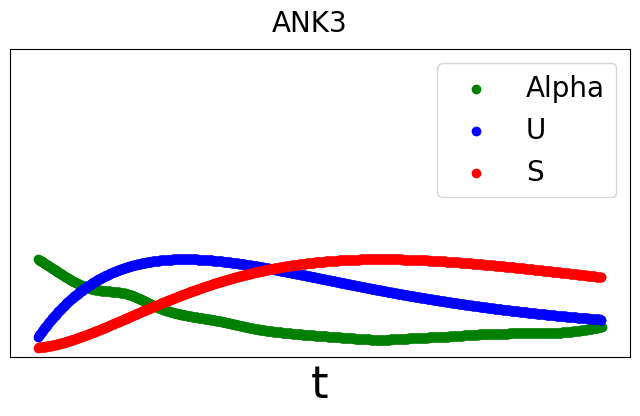

Drawing ANK3


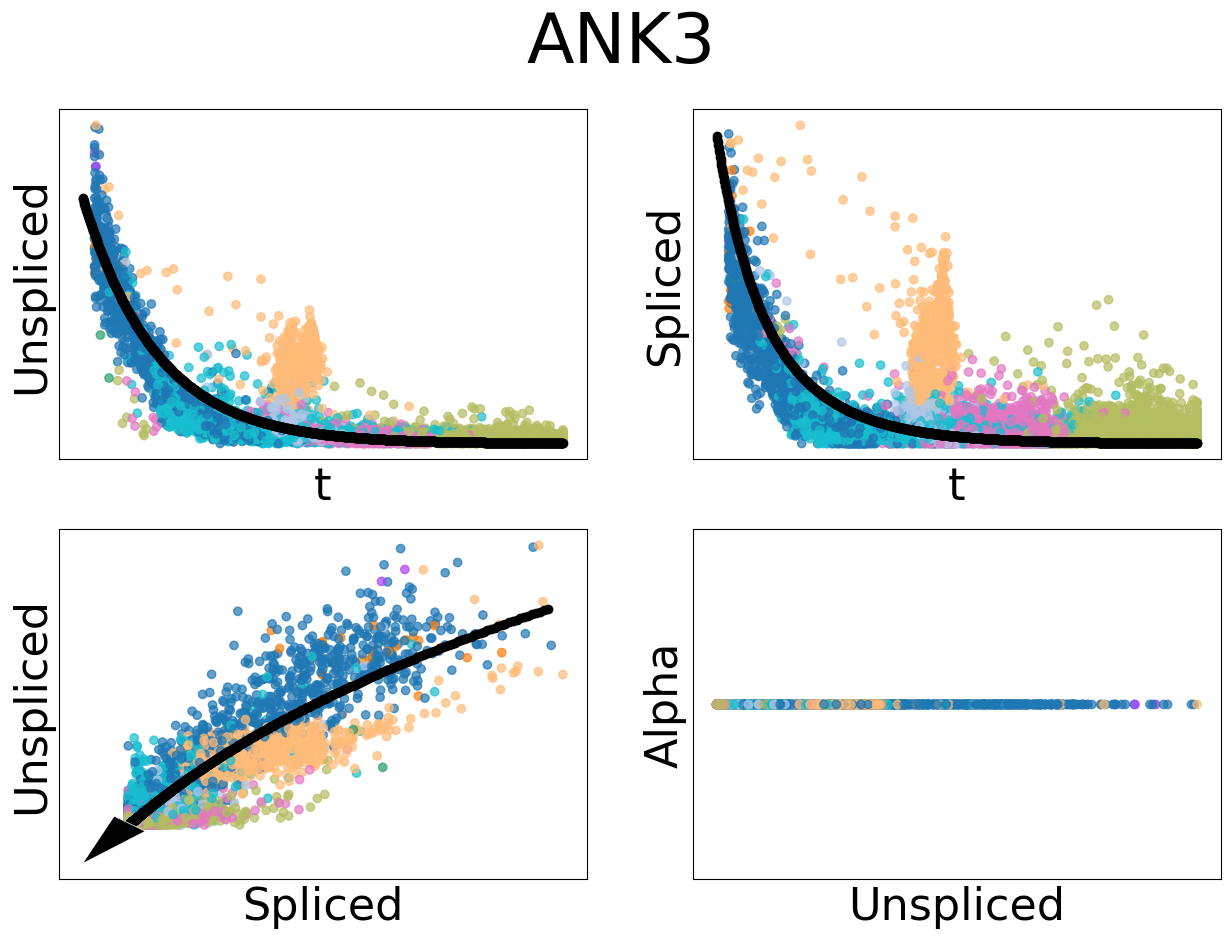

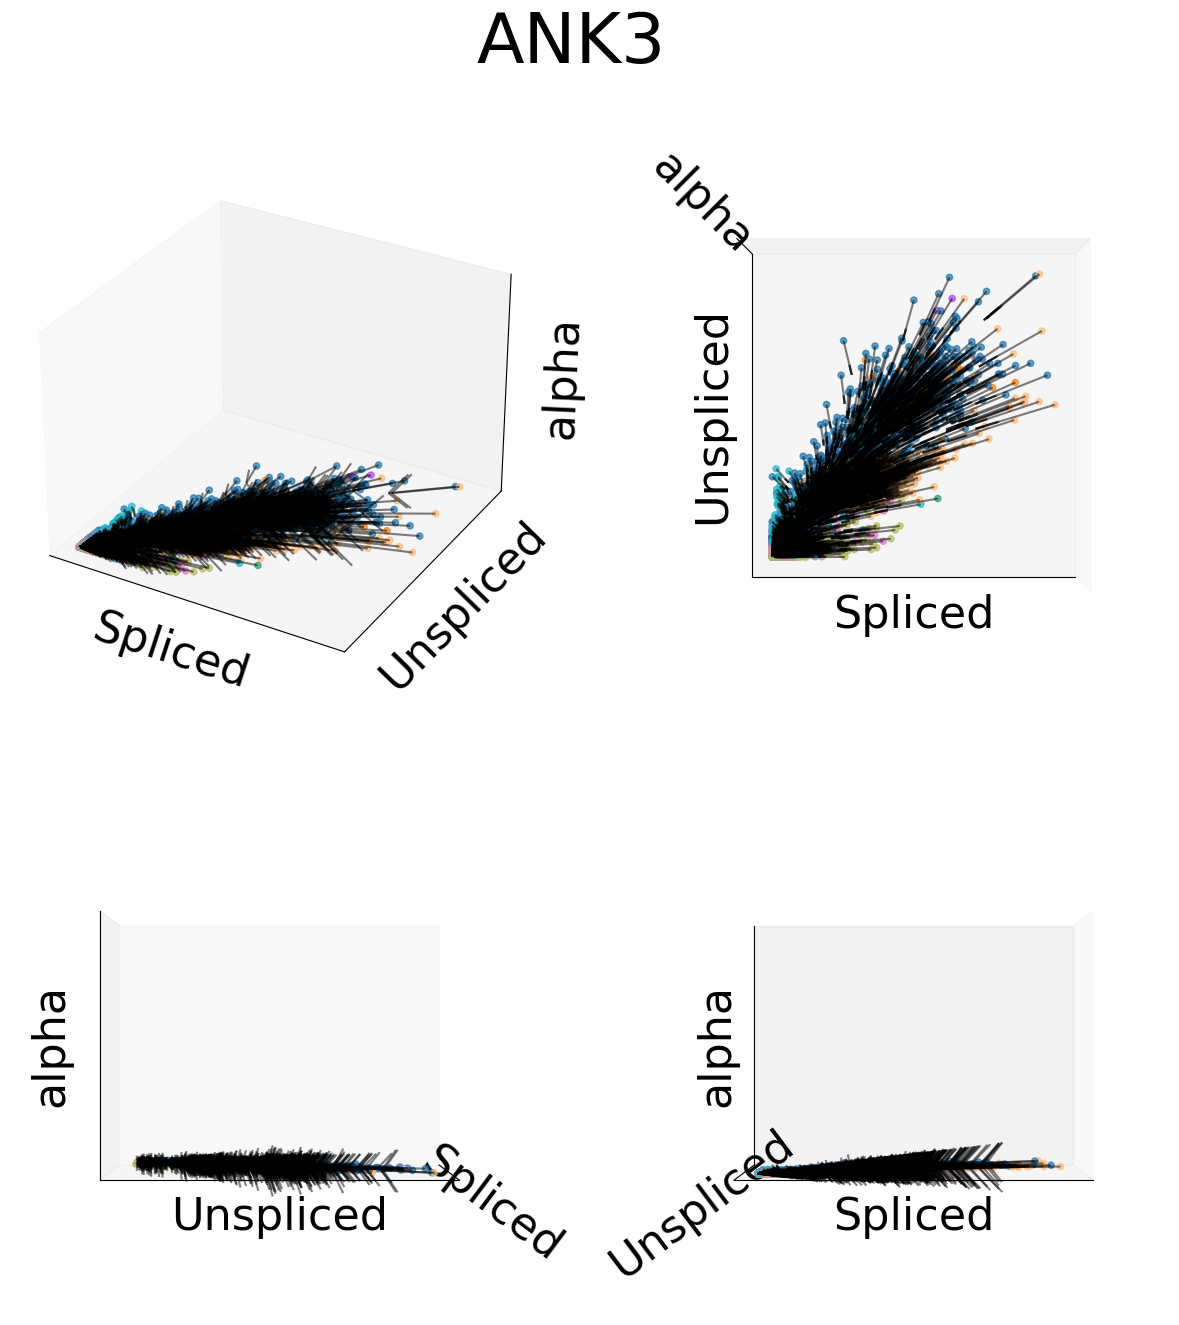

Drawing ANK3


/home/jcli/anaconda3/envs/TFvelo2_env/lib/python3.8/site-packages/pygam/pygam.py:806: RuntimeWarning: divide by zero encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)
/home/jcli/anaconda3/envs/TFvelo2_env/lib/python3.8/site-packages/pygam/pygam.py:806: RuntimeWarning: invalid value encountered in scalar divide
  diff = np.linalg.norm(self.coef_ - coef_new) / np.linalg.norm(coef_new)
/home/jcli/anaconda3/envs/TFvelo2_env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2134: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/jcli/anaconda3/envs/TFvelo2_env/lib/python3.8/site-packages/pygam/distributions.py:199: RuntimeWarning: invalid value encountered in divide
  dev /= self.scale
/home/jcli/anaconda3/envs/TFvelo2_env/lib/python3.8/site-packages/pygam/pygam.py:1292: RuntimeWarning: invalid value encountered in scalar divide
  score = score / rank


did not converge


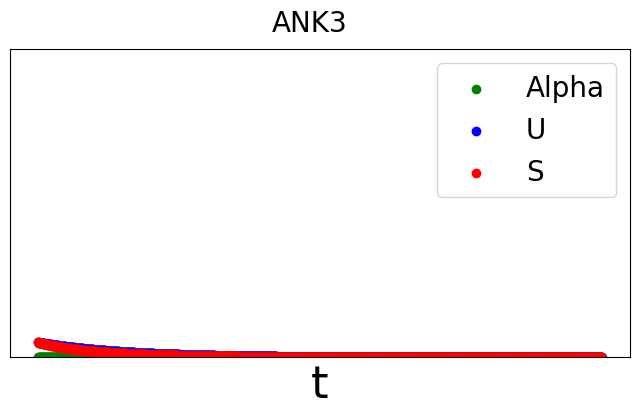

In [3]:
for g_id, g in enumerate(gene_list):
    max_subs = max_subs_dict[g]
    for li, adata_l in enumerate(adata_subs):
        max_ = max_subs[li]
        analyze_g(adata_l, g, max_, to_show=True)
        